In [2]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import matplotlib.pyplot as plt

## Incremental calibration 2023-2024

### Load data

In [8]:
# Get data
df = pd.read_csv('accuracy.csv')
# Columns to aggregate
cols = ['WIS', 'relative_WIS_nodrift', 'relative_WIS_drift']
group_keys = ['model', 'immunity_linking', 'ED_visits', 'season', 'hyperparameters']
# Drop NaNs
df_clean = df.dropna(subset=cols)
# Group by model/immunity_linking/ED_visits
grouped = df_clean.groupby(group_keys)
# Compute mean
mean_df = grouped[cols].mean()
# Compute gmean
gmean_df = grouped[cols].agg(lambda x: gmean(np.array(x, dtype=float)))
# Add 'mean' and 'gmean' as new first-level column index
mean_df.columns = pd.MultiIndex.from_tuples([('mean', col) for col in mean_df.columns])
gmean_df.columns = pd.MultiIndex.from_tuples([('gmean', col) for col in gmean_df.columns])
# Combine them along columns
summary_df = pd.concat([mean_df, gmean_df], axis=1)
# Sort by column levels: ('mean', 'WIS'), ('gmean', 'WIS'), etc.
summary_df = summary_df.sort_index(axis=1, level=0)
summary_df = summary_df.round(2)

In [9]:
summary_df.loc

gmean  \
                                                                              WIS   
model  immunity_linking ED_visits season    hyperparameters                         
SIR-1S False            False     2023-2024 hyperpars-2023-2024_training_0  59.06   
                                            hyperpars-2023-2024_training_1  50.95   
                                            hyperpars-2023-2024_training_2  48.10   
                                            hyperpars-2023-2024_training_3  51.72   
                                            hyperpars-2023-2024_training_4  60.14   
...                                                                           ...   
SIR-3S False            True      2024-2025 hyperpars-2024-2025_training_2  66.80   
                                            hyperpars-2024-2025_training_3  62.90   
                                            hyperpars-2024-2025_training_4  57.90   
                                            hyperpars-2024-2025_training_5  58.93   
                                            hyperpars-2024-2025_training_6  58.80   

                                                                                               \
                                                                           relative_WIS_drift   
model  immunity_linking ED_visits season    hyperparameters                                     
SIR-1S False            False     2023-2024 hyperpars-2023-2024_training_0               0.78   
                                            hyperpars-2023-2024_training_1               0.67   
                                            hyperpars-2023-2024_training_2               0.63   
                                            hyperpars-2023-2024_training_3               0.68   
                                            hyperpars-2023-2024_training_4               0.79   
...                                                                                       ...   
SIR-3S False            True      2024-2025 hyperpars-2024-2025_training_2               0.72   
                                            hyperpars-2024-2025_training_3               0.68   
                                            hyperpars-2024-2025_training_4               0.63   
                                            hyperpars-2024-2025_training_5               0.64   
                                            hyperpars-2024-2025_training_6               0.64   

                                                                                                 \
                                                                           relative_WIS_nodrift   
model  immunity_linking ED_visits season    hyperparameters                                       
SIR-1S False            False     2023-2024 hyperpars-2023-2024_training_0                 0.59   
                                            hyperpars-2023-2024_training_1                 0.51   
                                            hyperpars-2023-2024_training_2                 0.48   
                                            hyperpars-2023-2024_training_3                 0.52   
                                            hyperpars-2023-2024_training_4                 0.60   
...                                                                                         ...   
SIR-3S False            True      2024-2025 hyperpars-2024-2025_training_2                 0.40   
                                            hyperpars-2024-2025_training_3                 0.38   
                                            hyperpars-2024-2025_training_4                 0.35   
                                            hyperpars-2024-2025_training_5                 0.36   
                                            hyperpars-2024-2025_training_6                 0.35   

                                                                              mean  \
                                                     

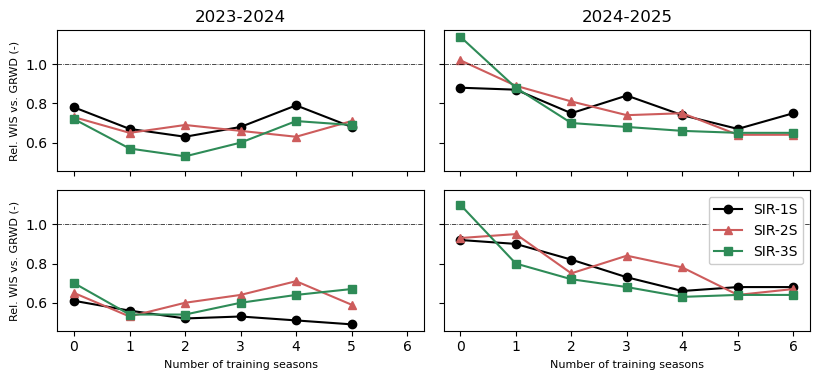

In [112]:
# get indices
models = summary_df.index.get_level_values('model').unique()
ED_visits = summary_df.index.get_level_values('ED_visits').unique()
seasons = summary_df.index.get_level_values('season').unique()

# init figure
fig,axes=plt.subplots(nrows=len(ED_visits), ncols=len(seasons), figsize=(8.3, 11.7/3), sharey=True, sharex=True)

# assign colors and linestyles
ED_visits_ls = ['-', '-.']
models_colors = ['black', 'indianred', 'seagreen']
models_markers = ['o', '^', 's']

for i, ILI in enumerate(ED_visits): 
    for j, season in enumerate(seasons):
        ax = axes[i,j]
        for model, marker, color in zip(models, models_markers, models_colors):
            ax.plot(summary_df.loc[(model, False, ILI, season, slice(None)), ('gmean','relative_WIS_drift')].values, marker=marker, color=color, label=f"{model}")
        ax.axhline(1, color='black', linestyle='-.', linewidth=0.5)
        if j==0:
            ax.set_ylabel('Rel. WIS vs. GRWD (-)', size=8)
        if i==1:
            ax.set_xlabel('Number of training seasons', size=8)
        if ((i==1) & (j==1)):
            ax.legend(framealpha=1)
        if i==0:
            ax.set_title(f"{season}")
        
plt.tight_layout()
plt.savefig('incremental-training.pdf')
plt.show()
plt.close()